# Homework 2: Plotting Climatologies
Since I am working with reforecast data from 3 months of 6 years, I decided to do a yearly climatology and a monthly climatology. The yearly climatology will thus be the average of the 3 months of each year averaged together, and the monthly climatology will be the average of each month from each year together. 


In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt

In [2]:
# load in the dataset
file1='/scratch/ldoyle4/subset/precip.nc'
file2='/scratch/ldoyle4/subset/ts.nc'
file3='/scratch/ldoyle4/subset/z500.nc'
files = [file1, file2, file3]
print(files)
ds = xr.open_mfdataset(files, combine='nested')

['/scratch/ldoyle4/subset/precip.nc', '/scratch/ldoyle4/subset/ts.nc', '/scratch/ldoyle4/subset/z500.nc']


In [4]:
ds 

<xarray.Dataset>
Dimensions:    (time: 558, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-08-02 ... 2016-10-31
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
Data variables:
    precip     (time, latitude, longitude) float64 dask.array<chunksize=(558, 53, 89), meta=np.ndarray>
    ts         (time, latitude, longitude) float64 dask.array<chunksize=(558, 53, 89), meta=np.ndarray>
    z500       (time, latitude, longitude) float64 dask.array<chunksize=(558, 53, 89), meta=np.ndarray>
Attributes:
    history:                   Mon Oct 10 17:38:35 2022: ncatted -a calendar,...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

# Yearly Climatology

In [5]:
clim_year = ds.groupby('time.year').mean()
clim_year

<xarray.Dataset>
Dimensions:    (year: 6, latitude: 53, longitude: 89)
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
  * year       (year) int64 2011 2012 2013 2014 2015 2016
Data variables:
    precip     (year, latitude, longitude) float64 dask.array<chunksize=(1, 53, 89), meta=np.ndarray>
    ts         (year, latitude, longitude) float64 dask.array<chunksize=(1, 53, 89), meta=np.ndarray>
    z500       (year, latitude, longitude) float64 dask.array<chunksize=(1, 53, 89), meta=np.ndarray>

## Surface Temperature

The first thing I did before plotting the climatology on maps with the lat and lon was to plot on contour maps with the colorbars individually so that I could see what the bounds on the colorbars were. An issue I had previously in my homework attempts was my colorbar (and colormap) levels being in increments that were difficult to see. There is probably a more elegant approach to this problem, but this is the way I found easiest for me.

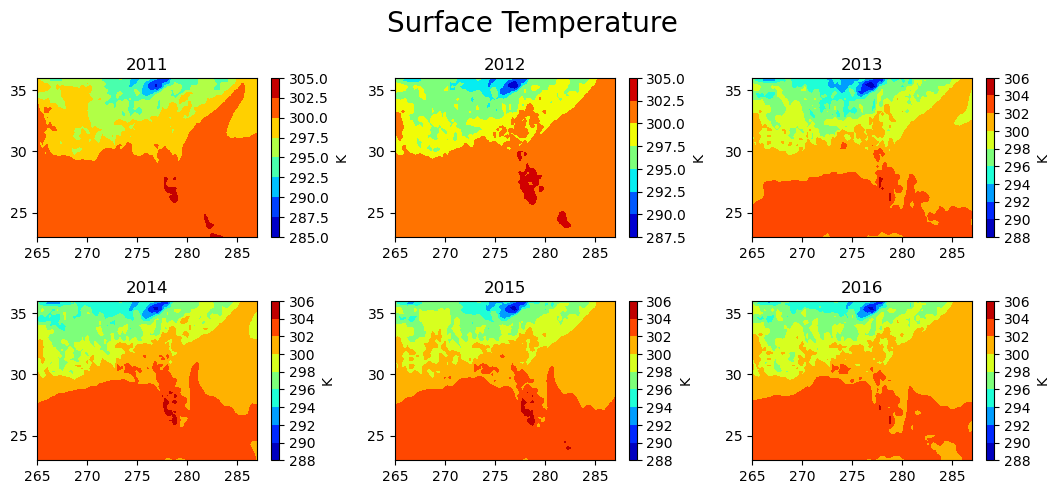

In [40]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.PlateCarree())
for i,year in enumerate(clim_year['year']):
    plt.subplot(2,3,i+1)
    plt.contourf(clim_year['longitude'],clim_year['latitude'],clim_year['ts'].sel(year=year),
                 cmap='jet')
    plt.title(year.values)
    plt.colorbar(label = 'K')
    ax.coastlines()
    ax.add_feature(feature.STATES)
plt.suptitle('Surface Temperature', fontsize=20)

fig.subplots_adjust(bottom=0.45, top=0.9, left=0.05, right=0.95,
                    wspace=0.3, hspace=0.4)

Now that I have my colorbar bounds, 285 to 306, I can plot my climatology on lat and lon maps:

Text(0.5, 0.98, 'Surface Temperature Yearly Climatology')

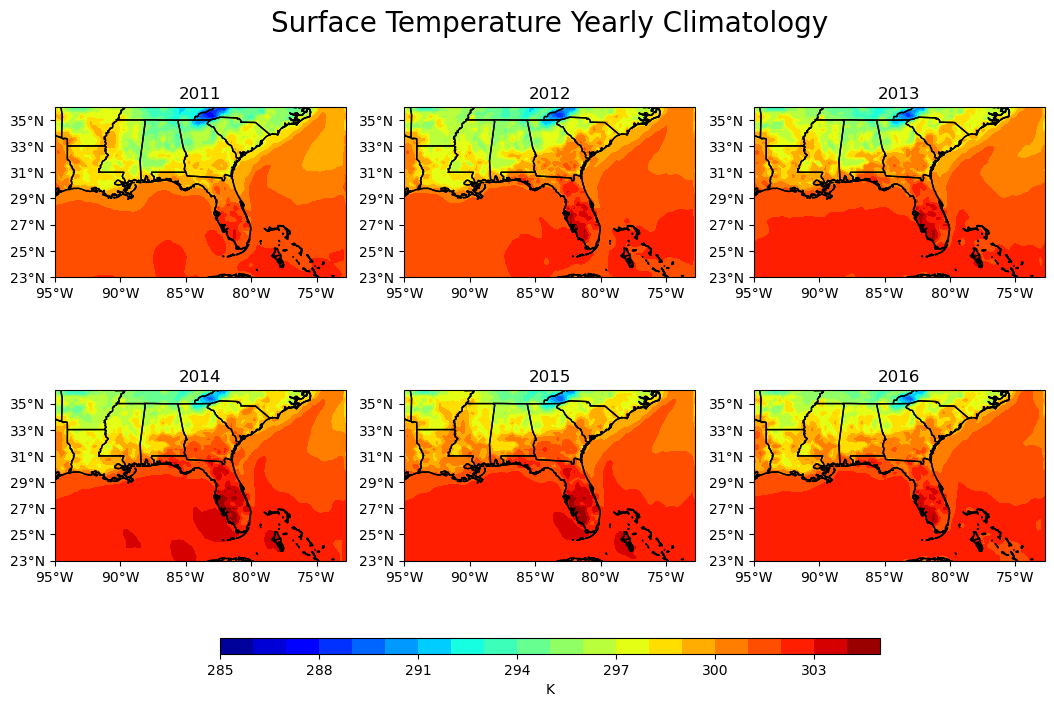

In [47]:
# Define the figure and each axis for the 1 row and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
# set the color level
clevs = np.arange(285,306,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the years and plot
for i,year in enumerate(clim_year['year']):

        # Select the year
        data=clim_year['ts'].sel(year=year)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=clim_year['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,clim_year['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        #set the x and y axis levels
        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the year
        axs[i].set_title(year.values)

        # Draw the coastines and states for each subplot
        axs[i].coastlines()
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# add a big title at the top
plt.suptitle('Surface Temperature Yearly Climatology', fontsize=20)

## Precipitation

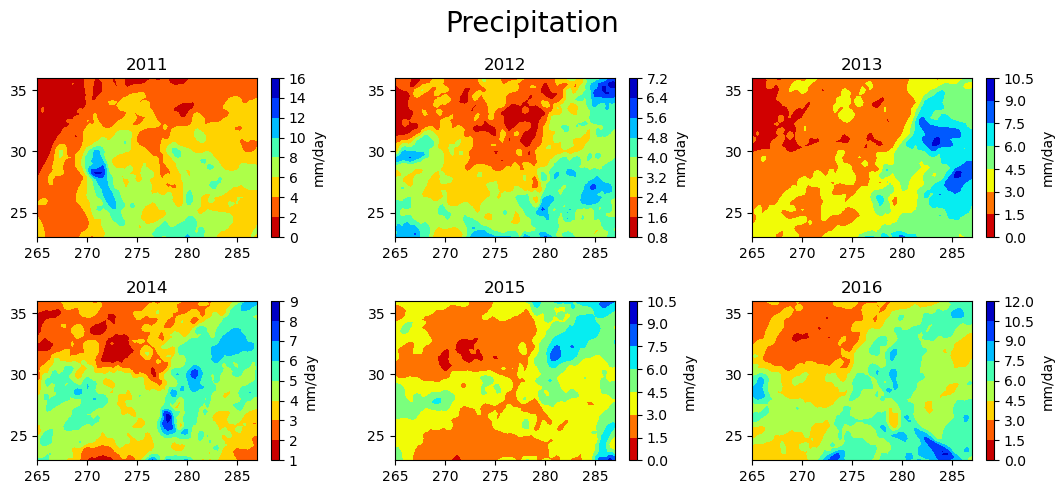

In [44]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.PlateCarree())
for i,year in enumerate(clim_year['year']):
    plt.subplot(2,3,i+1)
    plt.contourf(clim_year['longitude'],clim_year['latitude'],clim_year['precip'].sel(year=year),
                 cmap='jet_r')
    plt.title(year.values)
    plt.colorbar(label = 'mm/day')
    ax.coastlines()
    ax.add_feature(feature.STATES)
plt.suptitle('Precipitation', fontsize=20)

fig.subplots_adjust(bottom=0.45, top=0.9, left=0.05, right=0.95,
                    wspace=0.3, hspace=0.4)

Text(0.5, 0.98, 'Precipitation Yearly Climatology')

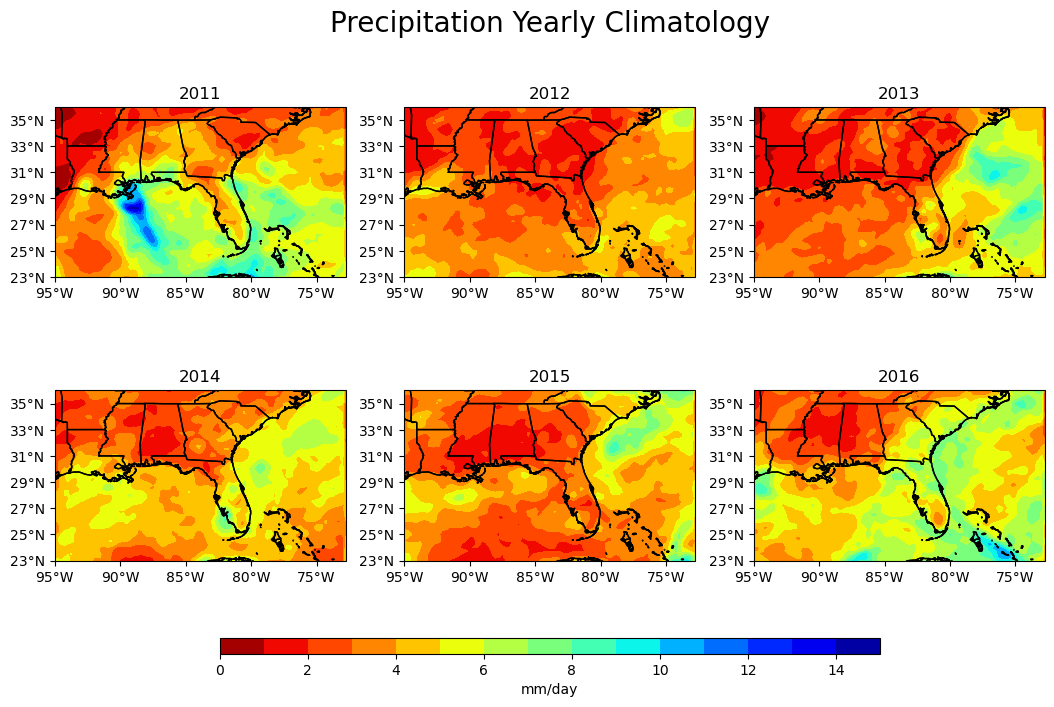

In [46]:
# Define the figure and each axis for the 1 row and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8))
#set the color levels
clevs = np.arange(0,16,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the years and plot
for i,year in enumerate(clim_year['year']):

        # Select the season
        data=clim_year['precip'].sel(year=year)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=clim_year['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,clim_year['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')
        
        #set the x and y levels
        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the year
        axs[i].set_title(year.values)

        # Draw the coastines and states for each subplot
        axs[i].coastlines()
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Precipitation Yearly Climatology', fontsize=20)

## 500 hPa Geopotential Height

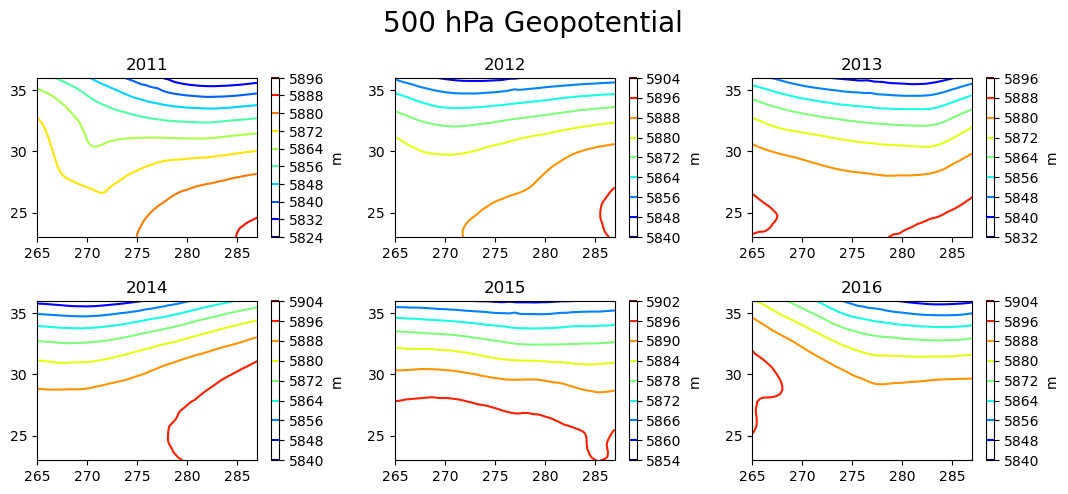

In [45]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.PlateCarree())
for i,year in enumerate(clim_year['year']):
    plt.subplot(2,3,i+1)
    plt.contour(clim_year['longitude'],clim_year['latitude'],clim_year['z500'].sel(year=year),
                 cmap='jet')
    plt.title(year.values)
    plt.colorbar(label = 'm')
    ax.coastlines()
    ax.add_feature(feature.STATES)
plt.suptitle('500 hPa Geopotential', fontsize=20)

fig.subplots_adjust(bottom=0.45, top=0.9, left=0.05, right=0.95,
                    wspace=0.3, hspace=0.4)

I had to set my max color level at 5906, because otherwise the 5904 colorbar would not show up. I think this is because I set my increment level to 5, and so the last one was not in the groups of 5. If I changed my increment, the amount of contours on the plots got overwhelming and it made it difficult to see what it was actually plotting.

Text(0.5, 0.98, 'z500 Yearly Climatology')

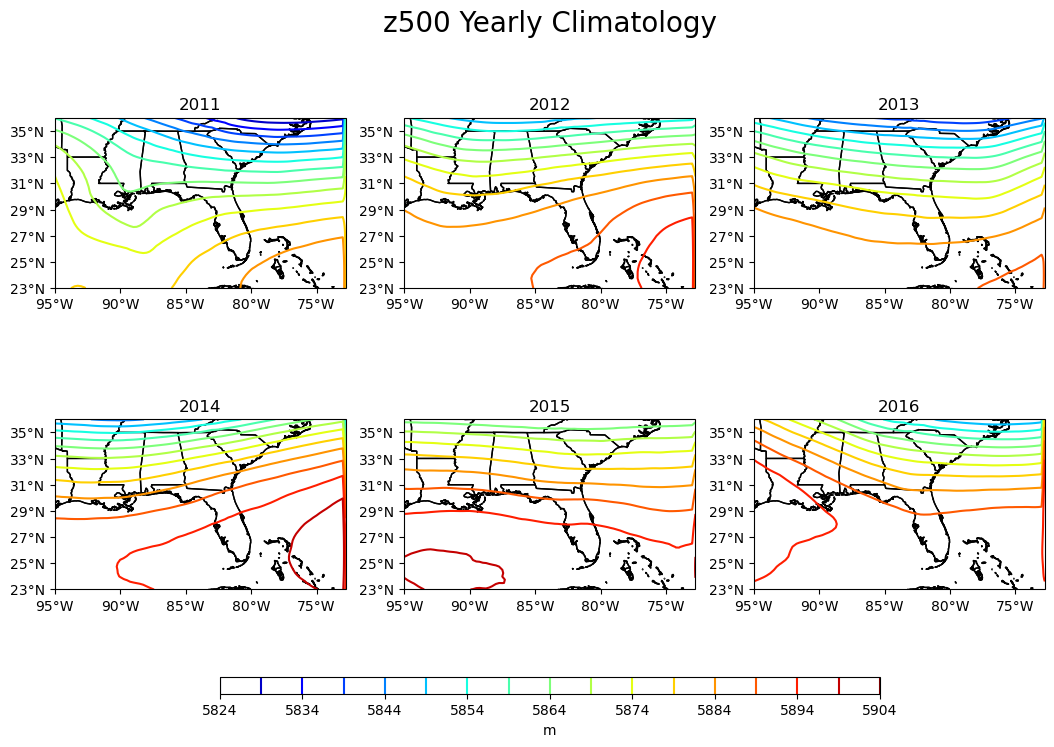

In [48]:
# Define the figure and each axis for the 1 row and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))
# add the color levels
clevs = np.arange(5824,5906,5) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the years and plot
for i,year in enumerate(clim_year['year']):

        # Select the year
        data=clim_year['z500'].sel(year=year)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=clim_year['longitude'])

        # Contour plot
        cs=axs[i].contour(lons,clim_year['latitude'],data, clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        # set the x and y axis levels
        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the year
        axs[i].set_title(year.values)

        # Draw the coastines and states for each subplot
        axs[i].coastlines()
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# add a big title at the top
plt.suptitle('z500 Yearly Climatology',fontsize=20)

# Monthly Climatology

In [20]:
clim_month = ds.groupby('time.month').mean()
clim_month

<xarray.Dataset>
Dimensions:    (month: 3, latitude: 53, longitude: 89)
Coordinates:
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
  * month      (month) int64 8 9 10
Data variables:
    precip     (month, latitude, longitude) float64 dask.array<chunksize=(1, 53, 89), meta=np.ndarray>
    ts         (month, latitude, longitude) float64 dask.array<chunksize=(1, 53, 89), meta=np.ndarray>
    z500       (month, latitude, longitude) float64 dask.array<chunksize=(1, 53, 89), meta=np.ndarray>

## Surface Temperature

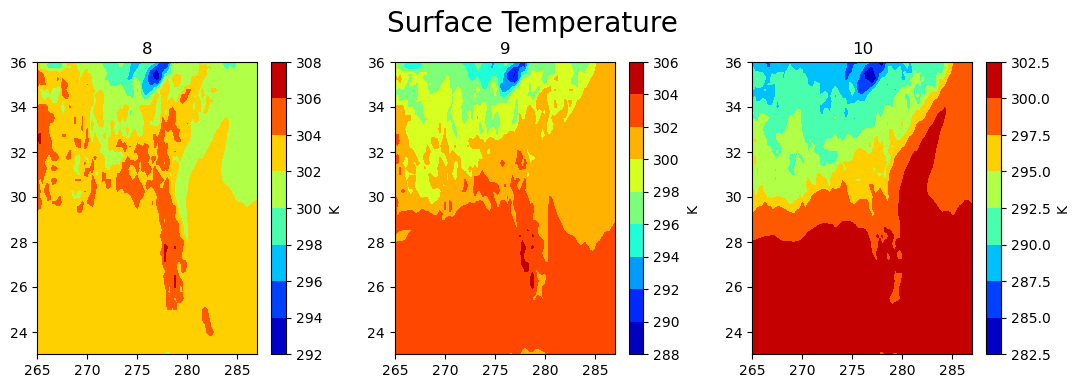

In [52]:
fig = plt.figure(figsize=(11,6.5))
ax=plt.axes(projection=ccrs.PlateCarree())
for i,month in enumerate(clim_month['month']):
    plt.subplot(1,3,i+1)
    plt.contourf(clim_month['longitude'],clim_month['latitude'],clim_month['ts'].sel(month=month),
                 cmap='jet')
    plt.title(month.values)
    plt.colorbar(label= 'K')
    ax.coastlines()
    ax.add_feature(feature.STATES)
plt.suptitle('Surface Temperature', fontsize=20)

fig.subplots_adjust(bottom=0.45, top=0.9, left=0.05, right=0.95,
                    wspace=0.3, hspace=0.4)

Text(0.5, 0.98, 'Surface Temperature Monthly Climatology')

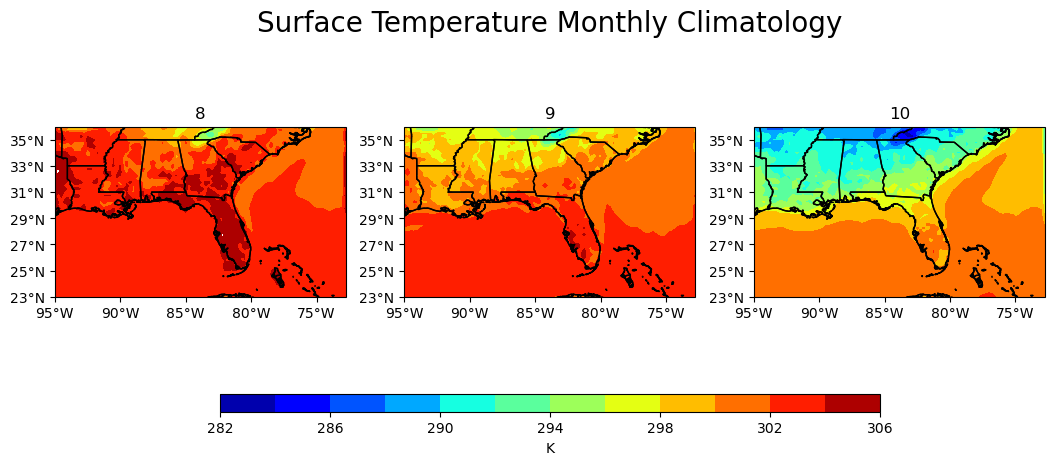

In [57]:
# Define the figure and each axis for the 1 row and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))
# add the color levels
clevs = np.arange(282,308,2) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the months and plot
for i,month in enumerate(clim_month['month']):

        # Select the month
        data=clim_month['ts'].sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=clim_month['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,clim_month['latitude'],data, clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        #set the x and y axis levels
        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the month
        axs[i].set_title(month.values)

        # Draw the coastines and states for each subplot
        axs[i].coastlines()
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.035])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='K')

# Add a big title at the top
plt.suptitle('Surface Temperature Monthly Climatology',fontsize=20)

## Precipitation

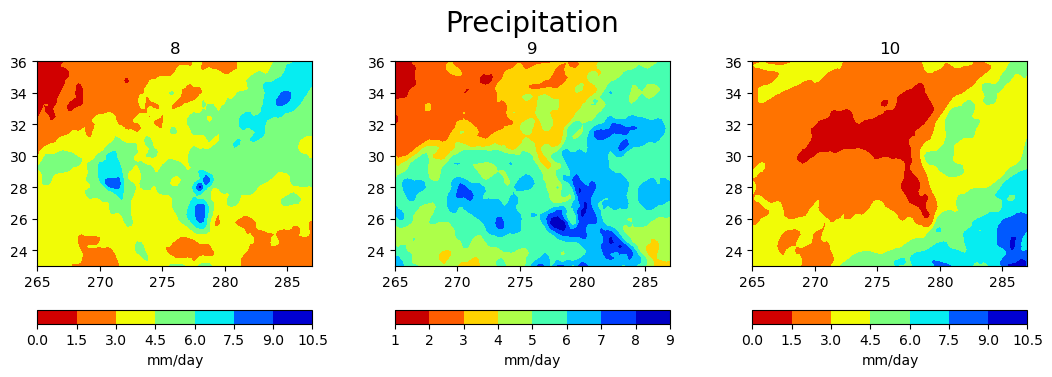

In [56]:
fig = plt.figure(figsize=(11,6.5))
ax=plt.axes(projection=ccrs.PlateCarree())
for i,month in enumerate(clim_month['month']):
    plt.subplot(1,3,i+1)
    plt.contourf(clim_month['longitude'],clim_month['latitude'],clim_month['precip'].sel(month=month),
                 cmap='jet_r')
    plt.title(month.values)
    plt.colorbar(label = 'mm/day', orientation = 'horizontal')
    ax.coastlines()
    ax.add_feature(feature.STATES)
plt.suptitle('Precipitation', fontsize=20)

fig.subplots_adjust(bottom=0.45, top=0.9, left=0.05, right=0.95,
                    wspace=0.3, hspace=0.4)

Text(0.5, 0.98, 'Precipitation Monthly Climatology')

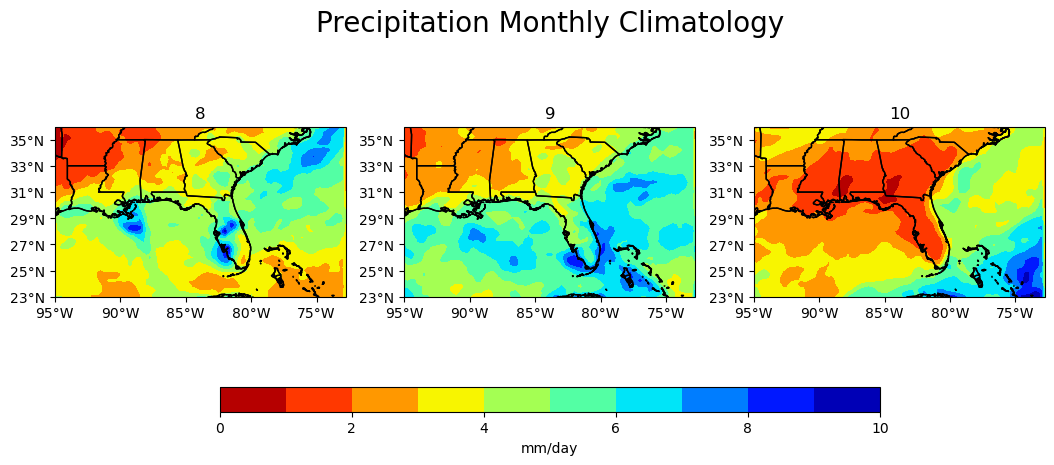

In [60]:
# Define the figure and each axis for the 1 row and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))
# add the color levels
clevs = np.arange(0,10.5,1) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the months and plot
for i,month in enumerate(clim_month['month']):

        # Select the month
        data=clim_month['precip'].sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=clim_month['longitude'])

        # Contour plot
        cs=axs[i].contourf(lons,clim_month['latitude'],data, clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet_r')

        #set the x and y axis levels
        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the month
        axs[i].set_title(month.values)

        # Draw the coastines and states for each subplot
        axs[i].coastlines()
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.05])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Precipitation Monthly Climatology',fontsize=20)

## 500 hPa Geopotential Height

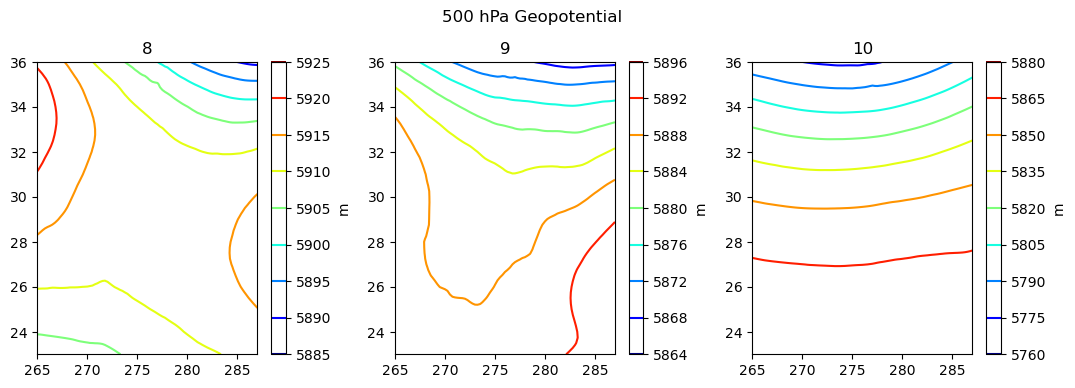

In [59]:
fig = plt.figure(figsize=(11,6.5))
ax=plt.axes(projection=ccrs.PlateCarree())
for i,month in enumerate(clim_month['month']):
    plt.subplot(1,3,i+1)
    plt.contour(clim_month['longitude'],clim_month['latitude'],clim_month['z500'].sel(month=month),
                 cmap='jet')
    plt.title(month.values)
    plt.colorbar(label = 'm')
    ax.coastlines()
    ax.add_feature(feature.STATES)
plt.suptitle('500 hPa Geopotential')

fig.subplots_adjust(bottom=0.45, top=0.9, left=0.05, right=0.95,
                    wspace=0.3, hspace=0.4)

I could not get the color bar to have the upper bound of 5925 m, I think there were too many contours and too wide of a range for it to show it correctly.

Text(0.5, 0.98, 'z500 Monthly Climatology')

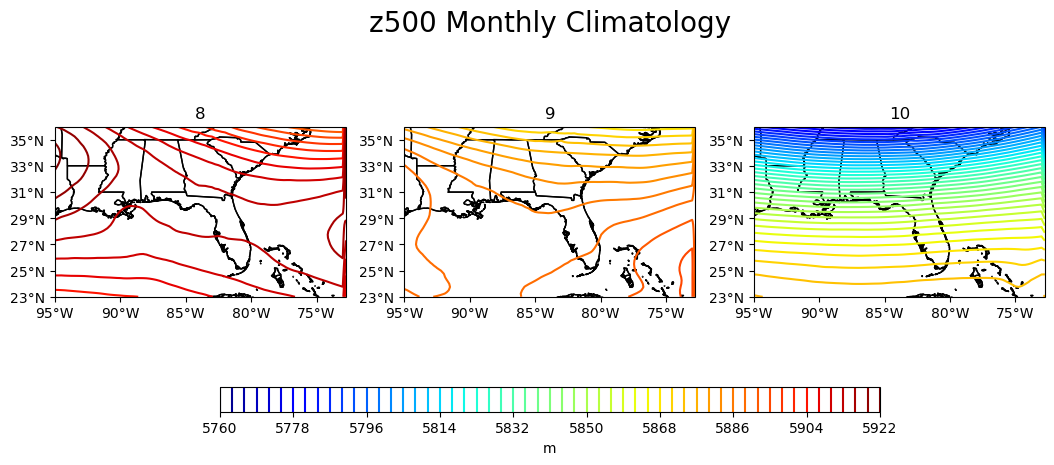

In [66]:
# Define the figure and each axis for the 1 row and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))
# add the color levels
clevs = np.arange(5760,5925,3) 
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the months and plot
for i,month in enumerate(clim_month['month']):

        # Select the month
        data=clim_month['z500'].sel(month=month)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=clim_month['longitude'])

        # Contour plot
        cs=axs[i].contour(lons,clim_month['latitude'],data, clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='jet')

        #set the x and y axis levels
        axs[i].set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the month
        axs[i].set_title(month.values)

        # Draw the coastines and states for each subplot
        axs[i].coastlines()
        axs[i].add_feature(feature.STATES)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.2)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.05])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='m')

# Add a big title at the top
plt.suptitle('z500 Monthly Climatology',fontsize=20)

# Discussion of Climatology:

## Yearly Climatology
### Surface Temperature
We can see that over the years for August through October, the surface warms up a bit, going from about 27 degrees Celsius to about 30 degrees Celsius. Something important to note about this data is that it is Surface Temperature, not Sea Surface Temperature.
### Precipitation
We see an average precipitation of about 15 mm/day off of the Mississippi River Delta only in 2011, which could mean that for August, September and October, there were strong precipitation events there. And that would make sense because in 2011 we had Tropical Storm Lee hit the Louisiana gulf coast, where the strongest precipitation associated was over 300 mm/day. We can also see some spots of higher precipitation in the Atlantic in 2013 and around the Bahamas in 2016.
### 500 hPa Geopotential Height
We can see the z500 contours move higher into the atmosphere over the years.

## Monthly Climatology
### Surface Temperature
As a monthly climatology, we can see that the surface temperature cools from August to October. In August, the average surface temperature is around 33 degrees celsius, and by October we have decreased to about 27 degrees Celsius, which is still favorable for tropical cyclones.
### Precipitation
For precipitation, we still see a similar high precipitation near the Mississippi River Delta. We also see more precipitation contours around the Atlantic and Florida for September, and even more contours around the Bahamas in October. This could indicate that the yearly climatology was influenced by specific months throughout the 5 years, specifically August 2011, September 2013, and October 2016. Again, this isn't exactly accurate because the climatology was only take with 18 months worth of daily data, which isn't nearly enough data to make assumptions about trends.
### 500 hPa Geopotential Height
We can see the average of the height contours in August is relatively high, and by October, we start to see lower height contours move in.

Geopotential height can be used to locate troughs and ridges (the upper level counterparts of surface cyclones and anticyclones). The primary characteristic of a trough is that it is a region with relatively lower heights. Height is a primary function of the average temperature of the air below that height surface. The density of air changes with temperature, so when the temperature of the air cools in becomes more dense and contracts. When the air cools, the height lowers because of the density increase of the air. But because air cools as it rises, troughs are found where air lifting. Troughs are also found in places where cold air masses are located (this troughing will be most pronounced in the upper levels [of the atmosphere]). Troughs indicate low levels, and so low pressures, which are conditions of weather, and can bring cold air masses in. 
* https://www.weather.gov/source/zhu/ZHU_Training_Page/Miscellaneous/Heights_Thicknesses/thickness_temperature.htm

Since September is when the cold temperature "season" starts in the northern hemisphere, the monthly climatology showing the decrease in geopotential heights, especially over the northern latitudes visible in the dataset, makes sense.
